Determine the solar system's barycenter

In [25]:
import spiceypy
import datetime
import numpy as np
from matplotlib import pyplot as plt

# Load kernels using the kernel_meta.txt file
spiceypy.furnsh("kernel_meta.txt")

Set start and end times in ephemeris time

In [26]:
# Datetime onject for the start
init_time_utc = datetime.datetime(year=2000, month=1, day=1, hour=0, minute=0, second=0)

# Number of days to calculate
delta_days = 10000

# Initial datetime object with added data
end_time_utc = init_time_utc + datetime.timedelta(days=delta_days)

# Convert datetime objects to strings
init_time_utc_str = init_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
end_time_utc_str = end_time_utc.strftime("%Y-%m-%dT%H:%M:%S")

# Convert UTC datetime to ephemeris time
init_time_et = spiceypy.utc2et(init_time_utc_str)
end_time_et = spiceypy.utc2et(end_time_utc_str)

Create array of barycenter positions relative to the sun

In [27]:
# Create an empty list for position data
ssb_wrt_sun_position = []

# Create an array between the two dates with the number of steps being the delta days
time_interval_et = np.linspace(start=init_time_et, stop=end_time_et, num=delta_days)

# Append an array with the position data on each given step
for time_interval_et_f in time_interval_et:
    _position, _ = spiceypy.spkgps(
        targ=0, et=time_interval_et_f, ref="ECLIPJ2000", obs=10
    )
    ssb_wrt_sun_position.append(_position)

# Turn list of arrays into single array
ssb_wrt_sun_position = np.array(ssb_wrt_sun_position)

Normalize barycenter distance to the radius of the sun

In [28]:
# Get radius of the sun in three dimensions
_, radii_sun = spiceypy.bodvcd(bodyid=10, item="RADII", maxn=3)

# All radii are effectively equal, using one dimension value
radius_sun = radii_sun[0]

# Create array of solar system barycenter distances relative to radius of sun
ssb_wrt_sun_position_scaled = ssb_wrt_sun_position / radius_sun

Text(0, 0.5, 'y in sun-radii')

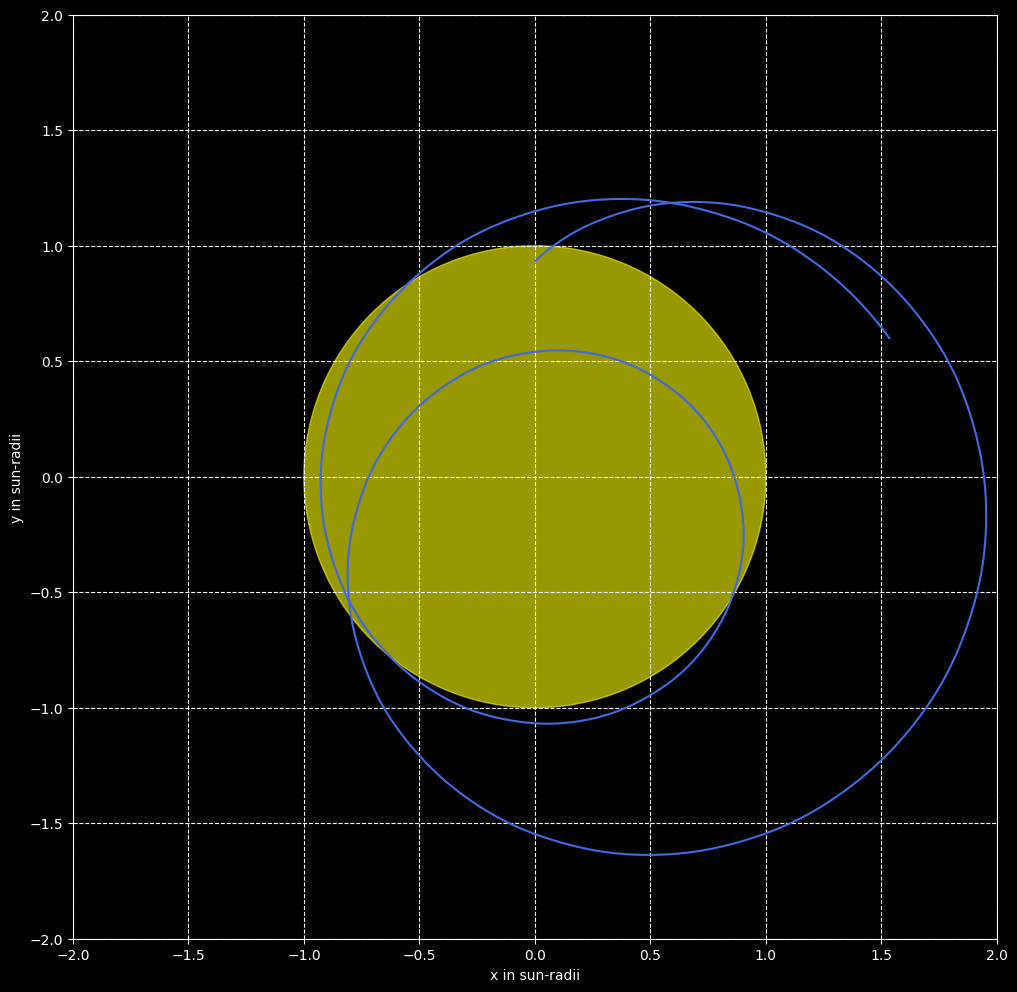

In [29]:
ssb_wrt_sun_position_scaled_xy = ssb_wrt_sun_position_scaled[:, 0:2]

# Set background to dark
plt.style.use("dark_background")

# Create a square plot
fig, ax = plt.subplots(figsize=(12, 12))

# Create a circle of 1 sun radius
sun_circ = plt.Circle((0.0, 0.0, 0.0), 1.0, color="yellow", alpha=0.6)
ax.add_artist(sun_circ)

# Plot a line of the barycenter locations
ax.plot(
    ssb_wrt_sun_position_scaled_xy[:, 0],
    ssb_wrt_sun_position_scaled_xy[:, 1],
    ls="solid",
    color="royalblue",
)

# Set aspect ratio to equal
ax.set_aspect("equal")

# Add gridlines to figure
ax.grid(True, linestyle="dashed")

# Set axes to go from -2 to 2 sun radii
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

ax.set_xlabel("x in sun-radii")
ax.set_ylabel("y in sun-radii")

In [30]:
# Determine distance of barycenter from center of sun
ssb_wrt_sun_distance_scaled = np.linalg.norm(ssb_wrt_sun_position_scaled, axis=1)

# Count number of days when barycenter distance is greater than the radius of the sun
ssb_outside_sun_delta_days = len(np.where(ssb_wrt_sun_distance_scaled > 1)[0])